Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [127]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [128]:
''' train_ds have totle 2239
    test_ds have totle 118 files 
    totle =2357 files , and train and test have 9 classe 
'''

' train_ds have totle 2239\n    test_ds have totle 118 files \n    totle =2357 files , and train and test have 9 classe \n'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Create a dataset

Define some parameters for the loader:

In [129]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

Use 80% of the images for training, and 20% for validation.

In [130]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 11239 files belonging to 9 classes.


In [131]:
len(train_ds)

352

The totle files is 2239 and btach_size is 32 

totole_batch = (2239/32) ~ 70

its mean 70 iteration 

In [132]:
# train dataset belong classe name 
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [133]:
# test_data 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Test',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size = (180,180,3)
    batch_size = batch_size             # 32
)

Found 118 files belonging to 9 classes.


The totle files is 118 and btach_size is 32

totole_batch = (118/32) ~ 4

its mean 4 iteration

In [134]:
len(val_ds)

4

In [135]:
# test dataset belong classe name 
val_ds.class_names


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [136]:
# this is tensore form because multidimension data 
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [137]:
# convert simple form 
# fetch 1 batch , 1 batch have 32 files  
for image_batch , lable_batch in val_ds.take(1) :
    print('this is one batch shape :',image_batch.shape)  # (batch_size,img_height,img_width,chanells)  
    print('this is lable shape :',lable_batch.shape)


this is one batch shape : (32, 180, 180, 3)
this is lable shape : (32,)


In [138]:
# normal formn 
for image_batch , label_batch in train_ds.take(1):
    print(image_batch.numpy())
    print('\n')
    print('convergt the lable in numeric : ',label_batch.numpy())

[[[[234.33333  148.33333  151.33333 ]
   [232.375    146.375    149.375   ]
   [237.29167  150.29167  157.95833 ]
   ...
   [229.24994  144.24994  147.58319 ]
   [229.375    144.375    149.375   ]
   [227.37502  142.37502  147.37502 ]]

  [[226.95834  140.95834  143.95834 ]
   [232.125    146.125    149.125   ]
   [228.41667  141.41667  149.08334 ]
   ...
   [224.62491  139.62491  142.62491 ]
   [226.375    141.375    144.375   ]
   [226.5      141.5      144.5     ]]

  [[230.04166  144.04166  147.04166 ]
   [236.75     150.75     153.75    ]
   [232.66667  145.66667  153.33333 ]
   ...
   [226.79172  141.91669  144.54178 ]
   [225.375    141.125    141.875   ]
   [224.58334  140.33334  141.08334 ]]

  ...

  [[208.875    133.375    128.54167 ]
   [217.125    139.125    135.125   ]
   [210.875    131.875    127.875   ]
   ...
   [211.25     139.29178  133.79166 ]
   [210.75     135.75     132.875   ]
   [213.12495  137.       136.49994 ]]

  [[213.08333  137.58333  132.75    ]
   [214

In [139]:

# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These class_names = orrespond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

(32, 180, 180, 3)
[6 5 4 6 8 4 8 5 5 3 1 5 2 0 7 7 8 5 6 5 4 3 6 7 7 8 4 4 2 2 2 4]


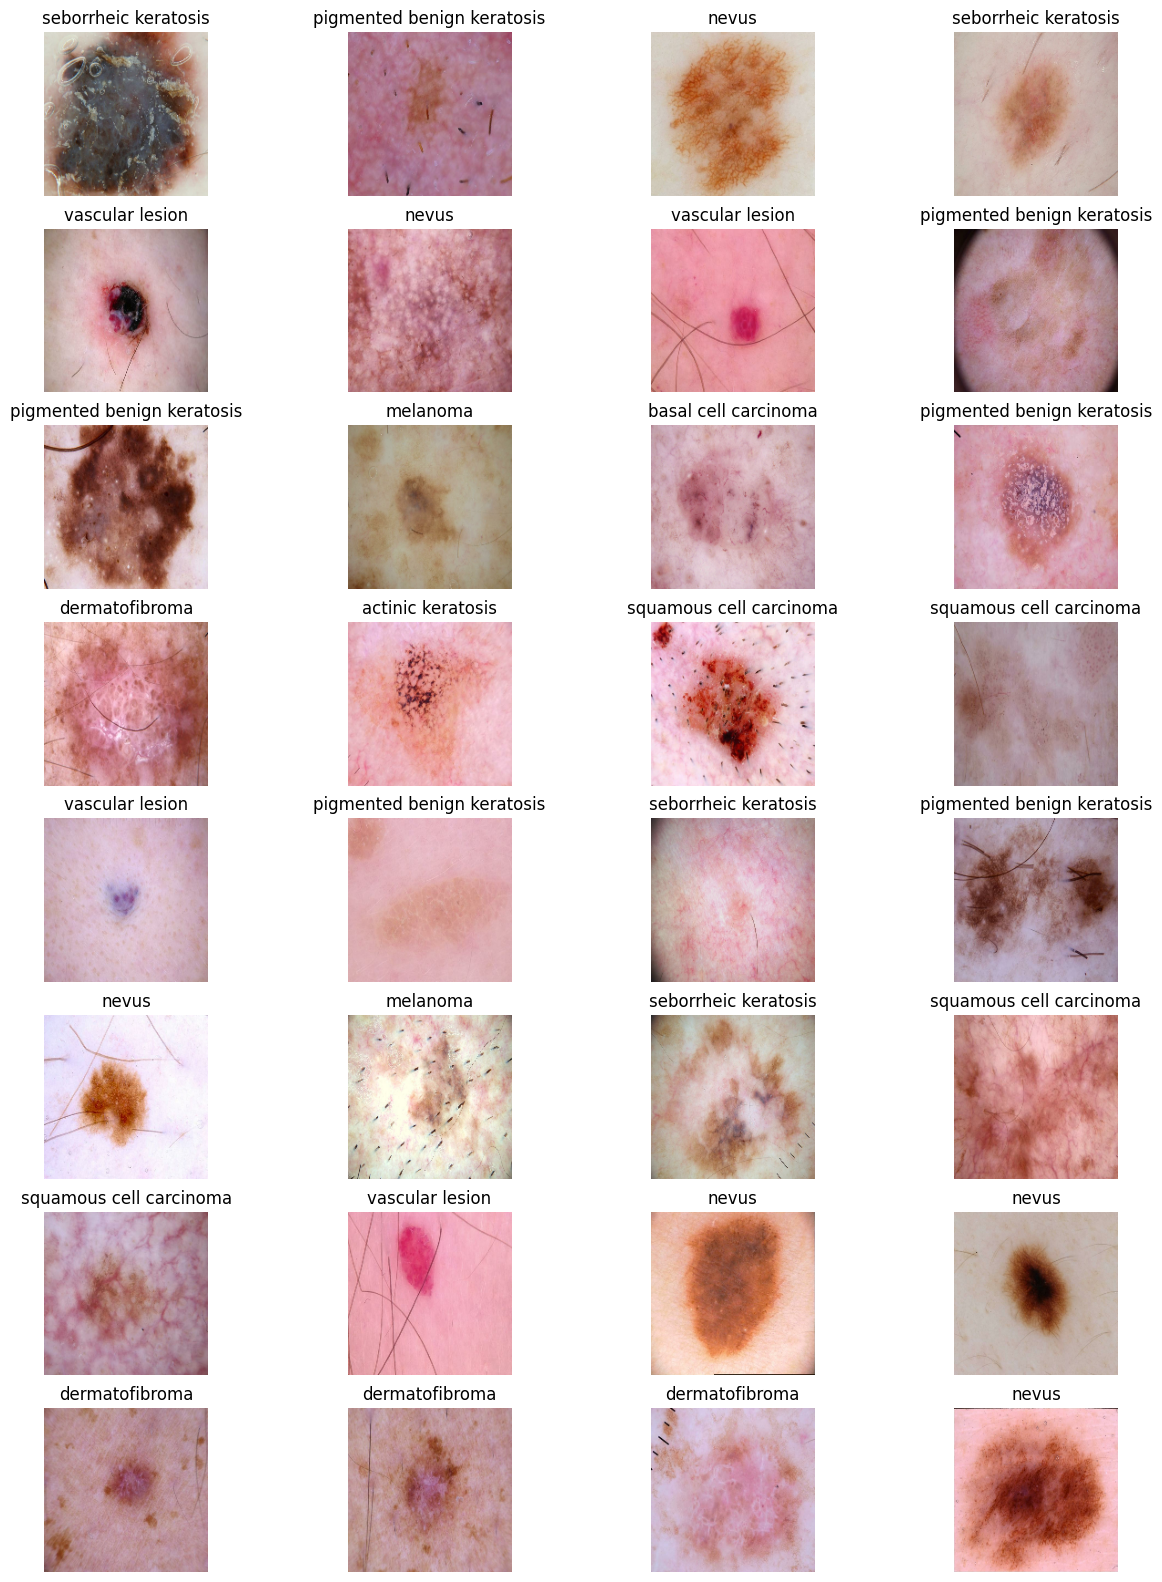

In [140]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(15,20))
for image_batch , labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [141]:
# incress the perfomance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


In [142]:
# resize and rescale the value 
# resize_and_rescale = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
#     tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
# ])

In [143]:
# data augmentation

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
# ])

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [144]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,BatchNormalization

In [145]:
input_shape = (batch_size , img_height , img_width , channels)

In [146]:
# create CNN model
from tensorflow.keras.layers import Input


model = Sequential()

input_shape = (180, 180, 3)
# Use Input layer to define input shape
model.add(Input(shape=input_shape))  # input_shape should be defined earlier, e.g., (180, 180, 3)

# Add convolutional and pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add dense layers
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.1))

# Output layer with the number of classes
model.add(Dense(n_classes, activation='softmax'))  # Use softmax for classification problems

# Summarize the model
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 180, 180, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 129600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │     4,147,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,206,249 (16.05 MB)

 Trainable params: 4,206,249 (16.05 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [147]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [148]:
# model.build(input_shape)

In [149]:
# View the summary of all layers
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 180, 180, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 129600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │     4,147,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,206,249 (16.05 MB)

 Trainable params: 4,206,249 (16.05 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [150]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 288s 805ms/step - accuracy: 0.1170 - loss: 19.0761 - val_accuracy: 0.1356 - val_loss: 2.1877
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 281s 799ms/step - accuracy: 0.1296 - loss: 2.1909 - val_accuracy: 0.1356 - val_loss: 2.1805
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 281s 797ms/step - accuracy: 0.1300 - loss: 2.1928 - val_accuracy: 0.1356 - val_loss: 2.1775
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 281s 798ms/step - accuracy: 0.1301 - loss: 2.1898 - val_accuracy: 0.1356 - val_loss: 2.1787
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 283s 803ms/step - accuracy: 0.1306 - loss: 2.1900 - val_accuracy: 0.1356 - val_loss: 2.1796


In [151]:
# accuracy of model each epochs
history.history['accuracy']

[0.12590087950229645,
 0.1307055801153183,
 0.12883707880973816,
 0.12732449173927307,
 0.12981581687927246]

In [152]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.1355932205915451,
 0.1355932205915451,
 0.1355932205915451,
 0.1355932205915451,
 0.1355932205915451]

In [153]:
# lost
history.history['loss']

[5.552181720733643,
 2.190845012664795,
 2.1906893253326416,
 2.1906251907348633,
 2.1906096935272217]

### Visualizing training results

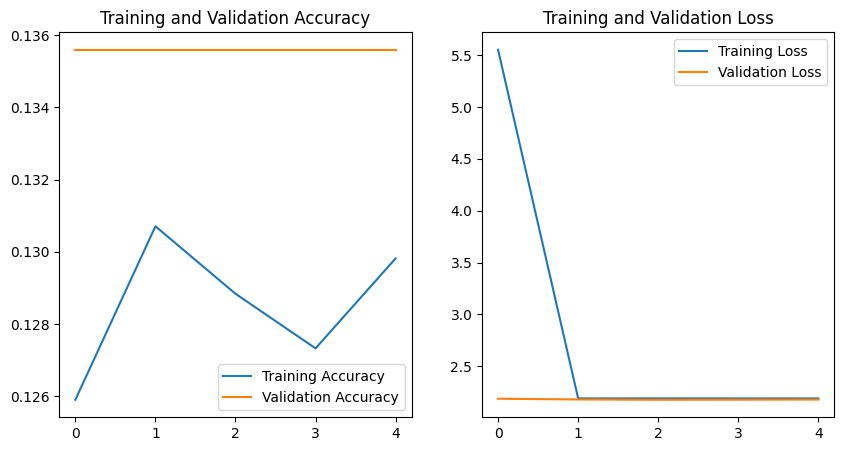

In [154]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
`Traning-accuracy = 48` and 

`validation-accuracy = 37` 

this is underfit model not good acurracy of traning and validation dataset 

### Write your findings here

In [155]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# data augmentation


# data_augmentation = keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1)
#   ]
# )

In [156]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# plt.figure(figsize=(12, 12))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     # augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [157]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()

# model.add(data_augmentation)

# model.add(resize_and_rescale)

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(n_classes))

### Compiling the model

In [158]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [159]:
## Your code goes here, note: train your model for 20 epochs
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 117ms/step - accuracy: 0.2158 - loss: 39.6165 - val_accuracy: 0.2203 - val_loss: 2.3682
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.3743 - loss: 1.6539 - val_accuracy: 0.2797 - val_loss: 2.9156
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.5474 - loss: 1.2370 - val_accuracy: 0.2373 - val_loss: 2.8472
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.6350 - loss: 1.0059 - val_accuracy: 0.3305 - val_loss: 4.0666
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - accuracy: 0.6989 - loss: 0.8430 - val_accuracy: 0.3220 - val_loss: 4.6323


### Visualizing the results

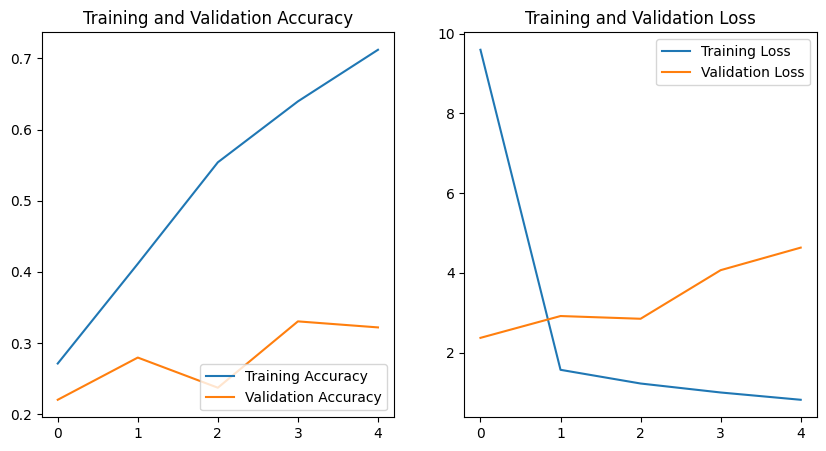

In [160]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

This model like underfiting beacuse 

`Traning accuracy = 51 ` and 

`Validation accuracy = 38 `

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [161]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [162]:
data_dir_train = pathlib.Path(r'E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train')


In [163]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [164]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))


In [165]:
count

[114, 376, 95, 438, 357, 462, 77, 181, 139]

<BarContainer object of 9 artists>

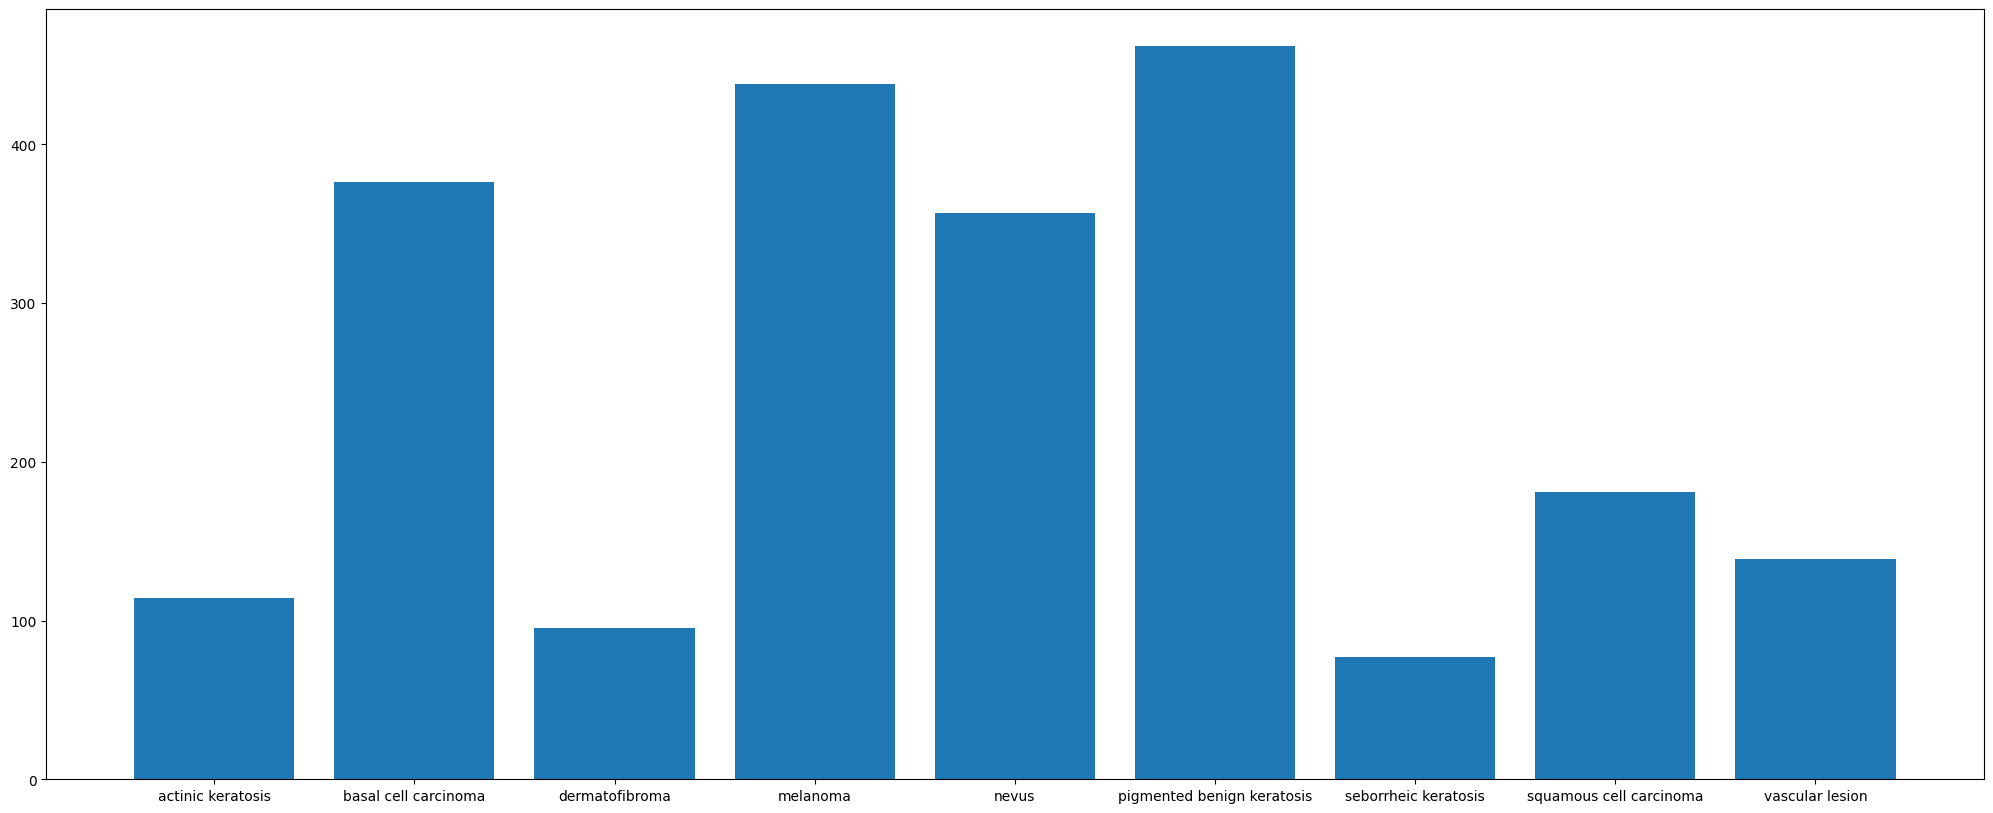

In [166]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [167]:
%pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [168]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C35543D4D0>: 100%|██████████| 500/500 [00:01<00:00, 300.93 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C357809310>: 100%|██████████| 500/500 [00:01<00:00, 282.69 Samples/s]


Initialised with 95 image(s) found.
Output directory set to E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C35531CC50>: 100%|██████████| 500/500 [00:01<00:00, 312.49 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1C355394390>: 100%|██████████| 500/500 [00:06<00:00, 72.17 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C35542E390>: 100%|██████████| 500/500 [00:05<00:00, 92.59 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C35536D910>: 100%|██████████| 500/500 [00:01<00:00, 365.51 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1C357694DD0>: 100%|██████████| 500/500 [00:02<00:00, 176.43 Samples/s]


Initialised with 181 image(s) found.
Output directory set to E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C35387CC10>: 100%|██████████| 500/500 [00:01<00:00, 343.05 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to E:\Codes\Python\ANN\MelanomaDetection\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C35574EAD0>: 100%|██████████| 500/500 [00:01<00:00, 355.80 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [169]:
#Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. 
#Lets take a look at total count of augmented images.

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


#### Lets see the distribution of augmented data after adding new images to the original training data.


<BarContainer object of 9 artists>

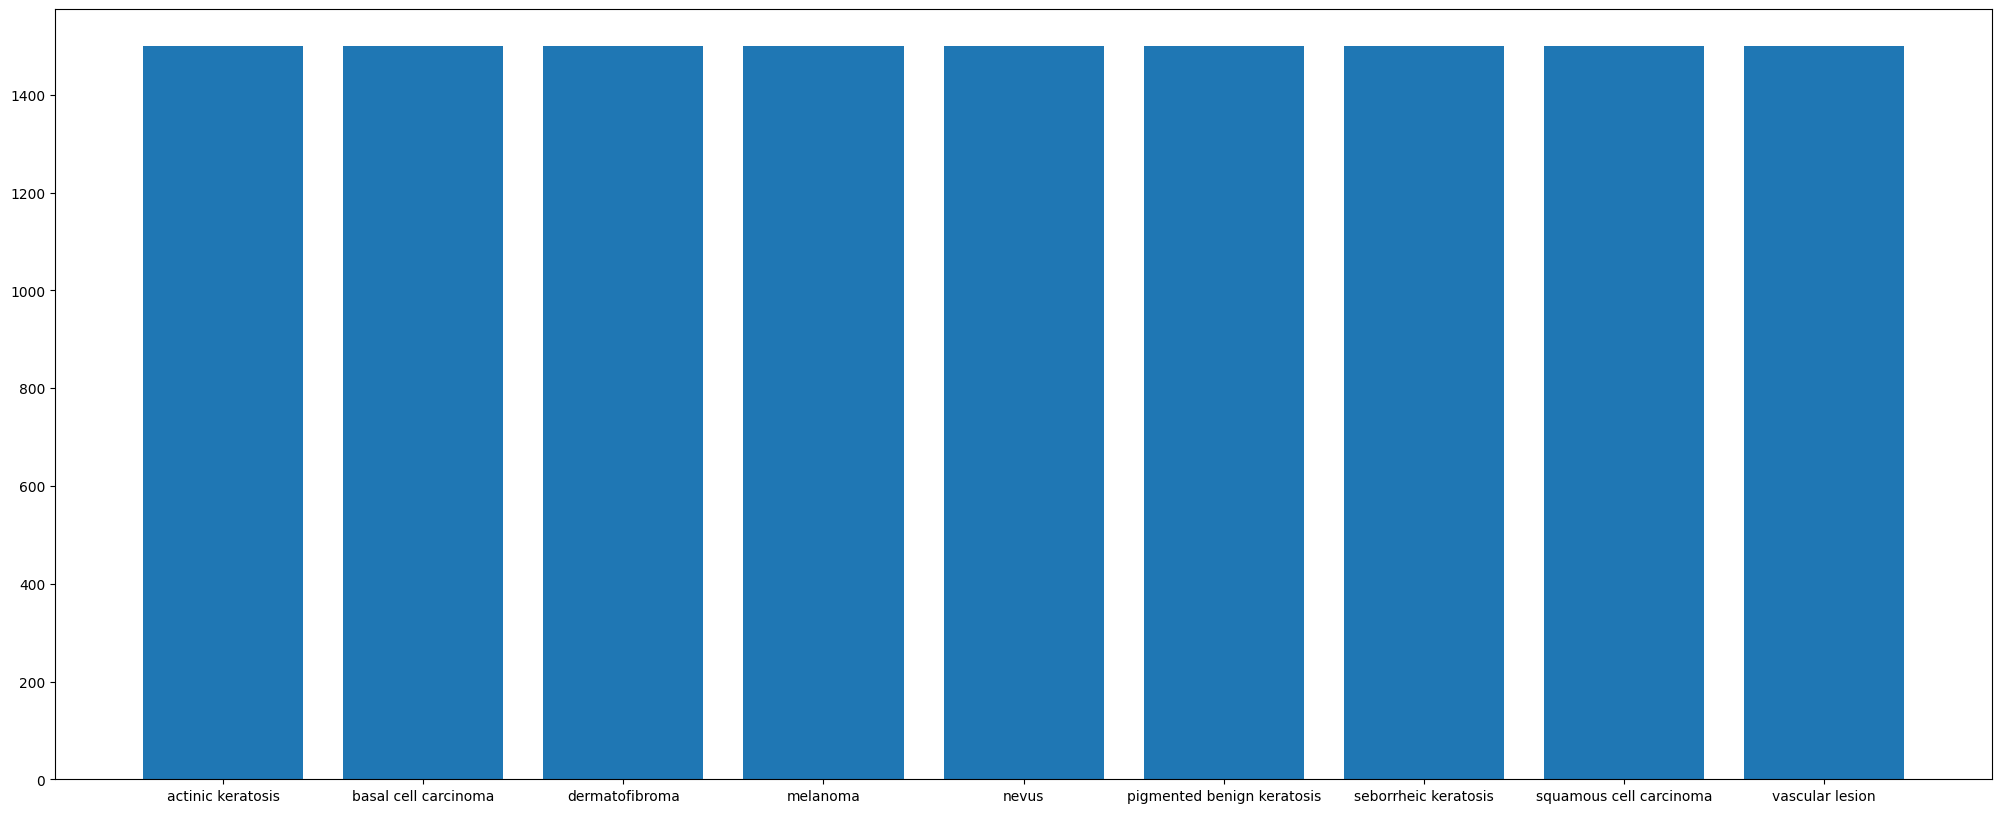

In [170]:
# Check the distribution of data again. 
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [171]:
import os
from glob import glob

In [172]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list

In [173]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [174]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [175]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [176]:
# df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [177]:
# new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [178]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [179]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


#### **Todo:** Create a validation dataset

In [180]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [181]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [182]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [183]:
epochs = 15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 56s 121ms/step - accuracy: 0.2620 - loss: 13.2626 - val_accuracy: 0.4614 - val_loss: 1.3765
Epoch 2/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.4846 - loss: 1.3746 - val_accuracy: 0.5685 - val_loss: 1.1607
Epoch 3/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.6031 - loss: 1.0745 - val_accuracy: 0.6956 - val_loss: 0.8715
Epoch 4/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.6948 - loss: 0.8340 - val_accuracy: 0.7486 - val_loss: 0.7327
Epoch 5/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.7635 - loss: 0.6584 - val_accuracy: 0.7369 - val_loss: 0.7686
Epoch 6/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.7794 - loss: 0.6224 - val_accuracy: 0.7849 - val_loss: 0.6627
Epoch 7/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.8131 - loss: 0.5142 - val_accuracy: 0.8109 - val_loss: 0.6075
Epoch 8/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.8485 - loss: 

#### **Todo:**  Visualize the model results

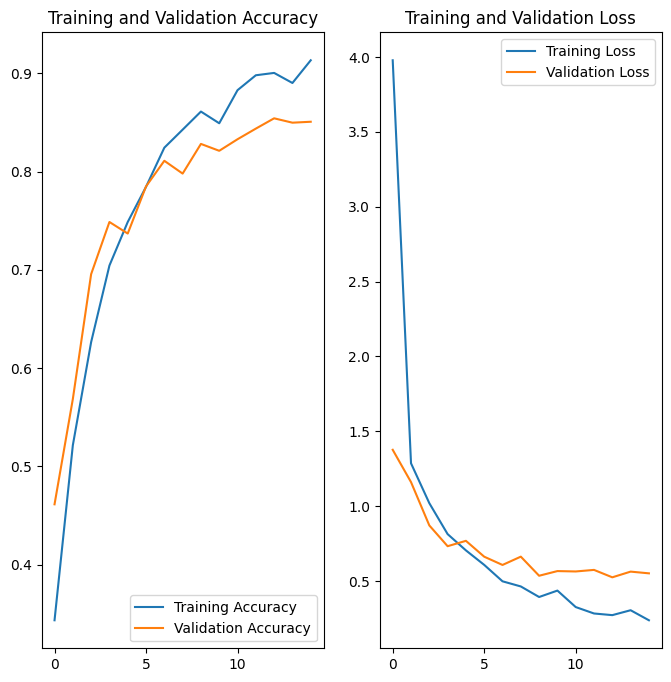

In [184]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This is good 

`Traning Accuracy = 92`

`Validation Accuracy = 80 `

thats good 